# Model Notebook

#### 1. Import Packages

In [44]:
# Basic Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string

# SK Packages
from tempfile import mkdtemp
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

import joblib

#### 2. Import Data

In [2]:
# Load DataFrame
file = 'C:/Users/Alex/OneDrive/BrainStation/Data_Science_Bootcamp/Capstone_Project/capstone-Aboard89/model_data.csv'
df = pd.read_csv(file)

In [3]:
df.head()

,race_index,year,F2_champion,Former_F1_World_Champion,home_race,constructorId,starting_grid_position,points_in_previous_race,laps_in_previous_race,race_win,...,Nationality_Monegasque,Nationality_New Zealander,Nationality_Polish,Nationality_Portuguese,Nationality_Russian,Nationality_Spanish,Nationality_Swedish,Nationality_Swiss,Nationality_Thai,Nationality_Venezuelan
0,2,1995,0,0,0,1,17,1.0,70.0,0,...,False,False,False,False,False,False,False,False,False,False
1,2,1995,0,0,0,1,5,3.0,70.0,0,...,False,False,False,False,False,False,False,False,False,False
2,2,1995,0,0,0,3,1,6.0,71.0,0,...,False,False,False,False,False,False,False,False,False,False
3,2,1995,0,1,0,3,2,0.0,30.0,1,...,False,False,False,False,False,False,False,False,False,False
4,2,1995,0,0,0,6,6,2.0,70.0,0,...,False,False,False,False,False,False,False,False,False,False


### 3. Train-Test-Split the Model

In [4]:
# Perform train-test split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)  # You can adjust the test_size as needed

# Save training and testing data to separate CSV files
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)

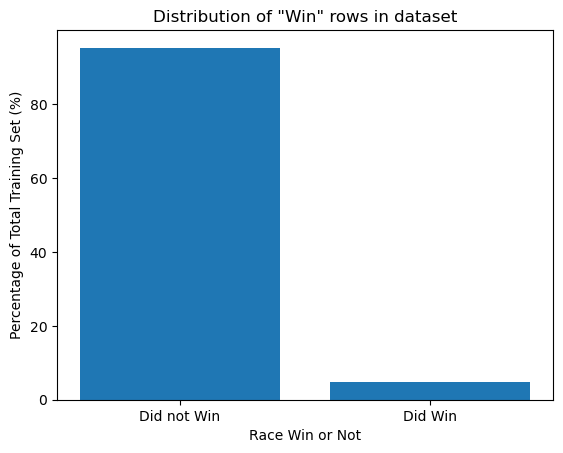

In [7]:
# Get the normalized value counts for the 'race_win' column and multiply by 100 to get percentages
value_counts = train_data['race_win'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure()
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel('Race Win or Not')
plt.ylabel('Percentage of Total Training Set (%)')
plt.xticks([0, 1], ['Did not Win', 'Did Win'])
plt.title('Distribution of "Win" rows in dataset')
plt.show()

This bar chart displays the class distribution for the training dataset concerning Formula 1 race outcomes, specifically showing the proportion of instances where a driver did not win compared to when they did. The stark contrast suggests a significant class imbalance, with the "Did not Win" category heavily outweighing the "Did Win" one. In predictive modeling, this imbalance poses a challenge because models might become biased towards predicting the majority class, in this case, "Did not Win." As a result, the model might perform poorly in correctly predicting the less frequent, but often more interesting, "Did Win" instances. To address this, techniques such as resampling, or specialized ML algorithms that are robust to class imbalance might be necessary.

### 4. **Logistics Regression**

In [10]:
# Define X and Y for the training model
X_train = train_data.drop('race_win', axis=1)
y_train = train_data['race_win']

In [11]:
# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [12]:
# Create the logistic regression model
model = LogisticRegression()

In [13]:
# Train the model
model.fit(X_train_scaled, y_train)

c:\Users\Alex\anaconda3\envs\capstone\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Predict on the training data (to see how well the model does on the data it was trained on)
y_train_pred = model.predict(X_train_scaled)

In [15]:
# Evaluate the model
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

[[8254   65]
 [ 321   96]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      8319
           1       0.60      0.23      0.33       417

    accuracy                           0.96      8736
   macro avg       0.78      0.61      0.65      8736
weighted avg       0.95      0.96      0.95      8736



The confusion matrix and the classification report provide an overview of the model's performance on the training set for predicting F1 race winners. From the confusion matrix, we see that the model predicted 'Did not Win' (class 0) correctly 8254 times, but it incorrectly predicted 'Did Win' (class 1) as 'Did not Win' 321 times. For the actual wins, the model only correctly predicted 961 instances of 'Did Win' and incorrectly predicted 'Did not Win' 65 times. 

The classification report provides further insight. While the model is quite precise at identifying the 'Did not Win' cases (96% precision), its recall for the 'Did Win' cases is only 23%, indicating it misses many actual wins. Consequently, the f1-score for the 'Did Win' predictions is low at 0.33, due to the poor recall. This seems to link in with the earlier identified class imbalance and indicates that while the model is adept at identifying non-winners, it struggles to identify the actual winners, which are of more interest in this context.

**Next Steps**

1. I will experiment with different algorithms that are more robust to imbalanced datasets, such as ensemble methods. Fine-tuning the model's hyperparameters could also enhance predictive performance.

2. Additionally, to improve the model's ability to predict F1 race winners, I will consider addressing the class imbalance by employing techniques such as oversampling the minority class (I can't really undersample the majority class as there are too few minority class). 

3. Another option is incorporating more discriminative features or engineered features that capture the dynamics of race-winning factors


### 5. **Optimizing LogReg Using Pipeline and Grid Search**

In [25]:
# Set up a directory to cache the pipeline results
cachedir = mkdtemp()

# Set up a pipeline
# The steps here act as placeholders and will be changed when we pass the pipeline

my_pipeline = Pipeline([('scaler', StandardScaler()),
('dim_reducer', PCA()),
('model', LogisticRegression())], memory=cachedir)

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Let's try the same range of C values from earlier
c_values = [.00001, .0001, .001, .1, 1, 10, 100, 1000, 10000]

# Parameter grid
logreg_param_grid = [
    # L1 without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(penalty='l1', solver='saga', random_state=1, n_jobs=-1, max_iter=100)],
     'model__C': c_values},

    # L1 with PCA
    {'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l1', solver='saga', random_state=1, n_jobs=-1, max_iter=100)],
     'model__C': c_values},

    # L2 (default) without PCA
    {'scaler': [None, StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [None],
     'model': [LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, n_jobs=-1, max_iter=100)],
     'model__C': c_values},

    # L2 (default) with PCA
    {'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
     'dim_reducer': [PCA()],
     'dim_reducer__n_components': [0.95, 0.9, 0.85, 0.8],
     'model': [LogisticRegression(penalty='l2', solver='lbfgs', random_state=1, n_jobs=-1, max_iter=100)],
     'model__C': c_values}
]

In [35]:
# Instantiate the log reg grid search
logreg_gs = GridSearchCV(my_pipeline, param_grid=logreg_param_grid, cv=5, n_jobs=-1)

# Fit the log reg grid search
fitted_logreg_gs = logreg_gs.fit(X_train, y_train)

In [37]:
# Reviewing the results
print("Best parameters set found on development set:")
print(logreg_gs.best_params_)
print("Best score:", logreg_gs.best_score_)

Best parameters set found on development set:
{'dim_reducer': None, 'model': LogisticRegression(C=10000, n_jobs=-1, random_state=1), 'model__C': 10000, 'scaler': StandardScaler()}
Best score: 0.9558146099426411


In [39]:
# Define X and Y for the training model
X_test = test_data.drop('race_win', axis=1)
y_test = test_data['race_win']

In [40]:
# Transform the test set features using the pipeline's transform method
X_test_scaled = logreg_gs.best_estimator_.named_steps['scaler'].transform(X_test)

# make predictions with the scaled test features using the best estimator
y_pred = logreg_gs.best_estimator_.predict(X_test_scaled)

In [41]:
# Making predictions using the best estimator
y_pred = logreg_gs.predict(X_test)

In [42]:
# Evaluating the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2057   20]
 [  73   35]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2077
           1       0.64      0.32      0.43       108

    accuracy                           0.96      2185
   macro avg       0.80      0.66      0.70      2185
weighted avg       0.95      0.96      0.95      2185

Accuracy: 0.9574370709382151


From the new confusion matrix, we can see that the model predicted the majority class (0, presumably the 'non-winner') quite accurately, with 2057 true negatives and only 20 false positives. However, it struggled more with the minority class (1, presumably the 'winner'), with a higher proportion of false negatives (73) relative to true positives (35). 

The classification report provides additional insight. The precision for class 1 is 0.64, meaning that when the model predicts a race winner, it is correct 64% of the time. The recall for class 1 is 0.32, indicating that the model only identifies 32% of the actual race winners. This is reflected in the lower F1-score for class 1 (0.43), which is a harmonic mean of precision and recall, showing that the model is less adept at predicting winners than non-winners.

Overall, the model is quite accurate (95.47%) when considering both classes together, but this high accuracy is largely due to its performance on the majority class. The relatively low F1-score for predicting winners suggests that there is room for improvement, particularly in how the model identifies the comparatively rare event of a race win.

#### **Comparison of the models**

Comparing the two models for our F1 race winner prediction project, the two models have similar accuracy scores, but the second "tuned" model is more effective at predicting the positive class (label 1), which is our class of interest (the actual race winners). The second "tuned" model had a better balance between sensitivity and precision for the positive class, with a recall of 0.32 versus 0.23 in the first model, suggesting it was better at identifying actual winners, despite a slightly lower overall accuracy. This trade-off is important in our project context where the correct prediction of race winners (a likely rare event) is more valuable than the overall accuracy rate.

### 6. **GridSearch with Decision Tree for comparison vs LogReg**

In [45]:
# create multiple pipeline objects for multiple models
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('LR', LogisticRegression(random_state=42))])

pipe_dt = Pipeline([('scl', StandardScaler()),
                    ('DT',DecisionTreeClassifier(random_state=42))])

In [47]:
# create seperate parameter grid for each model
lr_param_grid = [{'LR__penalty': ['l1', 'l2'],
                   'LR__C': [1.0, 0.5, 0.1],
                   'LR__solver': ['liblinear']}]
dt_param_grid = [{'DT__criterion': ['gini', 'entropy'],
                   'DT__min_samples_leaf': [1, 2, 3, 4, 5, 6],
                   'DT__max_depth': [1, 2, 3, 4, 5, 6],
                   'DT__min_samples_split': [2, 3, 4, 5, 6]}]

In [48]:
# finally, create a gridsearchcv object with the param grid
lr_grid_search = GridSearchCV(estimator=pipe_lr,
        param_grid=lr_param_grid,
        scoring='accuracy',
        cv=5)
dt_grid_search = GridSearchCV(estimator=pipe_dt,
        param_grid=dt_param_grid,
        scoring='accuracy',
        cv=5)

In [49]:
# putting it all together
grids = [lr_grid_search, dt_grid_search]
for pipe in grids:
    pipe.fit(X_train,y_train)

In [50]:
# find out performance of each model and best params
grid_dict = {0: 'Logistic Regression', 1: 'Decision Trees'}
for i, model in enumerate(grids):
    print('{} Test Accuracy: {}'.format(grid_dict[i],model.score(X_test,y_test)))
    print('{} Best Params: {}'.format(grid_dict[i],model.best_params_))

Logistic Regression Test Accuracy: 0.9560640732265446
Logistic Regression Best Params: {'LR__C': 1.0, 'LR__penalty': 'l1', 'LR__solver': 'liblinear'}
Decision Trees Test Accuracy: 0.9446224256292907
Decision Trees Best Params: {'DT__criterion': 'gini', 'DT__max_depth': 3, 'DT__min_samples_leaf': 4, 'DT__min_samples_split': 2}


#### **Analyse the results**

In [52]:
# Obtain predictions from the best logistic regression model
y_pred_lr = logreg_gs.best_estimator_.predict(X_test)

In [53]:
# Obtain predictions from the best decision tree model
y_pred_dt = dt_grid_search.best_estimator_.predict(X_test)

In [54]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))

print("Logistic Regression Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

print("Decision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2077
           1       0.64      0.32      0.43       108

    accuracy                           0.96      2185
   macro avg       0.80      0.66      0.70      2185
weighted avg       0.95      0.96      0.95      2185

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2077
           1       0.42      0.33      0.37       108

    accuracy                           0.94      2185
   macro avg       0.69      0.65      0.67      2185
weighted avg       0.94      0.94      0.94      2185

Logistic Regression Confusion Matrix:
[[2057   20]
 [  73   35]]
Decision Tree Confusion Matrix:
[[2028   49]
 [  72   36]]


The classification reports and confusion matrices for our F1 race winner prediction project reveal key insights into model performance. The Logistic Regression model has high precision and recall for the majority class (label 0), but it struggles with the minority class (label 1 - the actual race winners), with significantly lower recall. This means it often misses identifying the true race winners. 

The Decision Tree model shows a slightly more balanced performance between the classes, though overall it has lower precision and recall, which might lead to more false positives and false negatives overall. 

The confusion matrices further highlight these points: Logistic Regression correctly identifies non-winners most of the time but fails to identify winners reliably, while the Decision Tree sacrifices some accuracy on the majority class for a tiny improvement in identifying winners.

Either way, the results still aren't great at predicting the race winner, so we will need to work on other ideas to improve our model